In [1]:
import numpy as np
import pandas as pd

In [2]:
import re 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings

In [3]:
data = pd.read_csv("tweets.csv")

In [4]:
data.head()

,id,hashtag_generation_time,searched_hashtag,tweet_id,tweet_created_at,screen_name,name,user_description,followers_count,tweet,location,iso_language_code,retweet_count,user_created_at,favorite_count,entities,tweet_source,verified
0,7549,2022-08-26 13:56:37.490901+00,CBI Unfold D Truth InSSRCase,1563158353391779844,2022-08-26 13:36:08+00,ATUL7735,ATUL,NaN,301,RT @privin07: @divine__ssr @ATUL7735 Thanks a ...,India,en,4,2011-03-15,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False
1,6327,2022-08-26 13:54:52.480426+00,CBI Unfold D Truth InSSRCase,1563163059002101762,2022-08-26 13:54:50+00,BabyPink1803,Alli,Justice 4 Disha & SSR ~ :): 💛🦋💫 ~Your vibes sp...,1115,RT @keesain99: CBI Unfold D Truth InSSRCase \n...,Australia,en,114,2012-08-21,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False
2,6328,2022-08-26 13:54:52.618819+00,CBI Unfold D Truth InSSRCase,1563163056934334464,2022-08-26 13:54:49+00,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @ChintuJainHS: @SatyaSSRian1 @PMOIndia @DoP...,Canada,en,2,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False
3,6329,2022-08-26 13:54:52.656809+00,CBI Unfold D Truth InSSRCase,1563163055390744576,2022-08-26 13:54:49+00,its_ssrwarrior,S U P R I Y A,A Proud Fan of Sushant Singh Rajput.,2006,RT @sushfanseg: Why Rhea Chakraborty's custodi...,Earth,en,6,2020-10-02,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False
4,6330,2022-08-26 13:54:52.696796+00,CBI Unfold D Truth InSSRCase,1563163052102791168,2022-08-26 13:54:48+00,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @manisha_1604: @SatyaSSRian1 @PMOIndia @DoP...,Canada,en,10,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False


In [5]:
data.tail()

,id,hashtag_generation_time,searched_hashtag,tweet_id,tweet_created_at,screen_name,name,user_description,followers_count,tweet,location,iso_language_code,retweet_count,user_created_at,favorite_count,entities,tweet_source,verified
5227,11554,2022-08-27 09:37:33.966285+00,Perpetrators Free InSSRCase,1563450246876737536,2022-08-27 08:56:01+00,bunty81t,Prashant Kishor,NaN,44,"RT @SauravS91139716: Good Morning Warrior's,\n...",Delhi,en,62,2010-07-22,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter Web App,False
5228,11555,2022-08-27 09:37:33.96842+00,Perpetrators Free InSSRCase,1563450246373380096,2022-08-27 08:56:00+00,privin07,Preeti🇮🇳 (God➡️Karma🤗🔱🤛🙏💞),God is d ultimate power🌺\nShiva+Shakti🔱🙏\nKris...,3781,RT @GauriSh00526155: @privin07 @IAmApa07 @itsS...,National Capital 🇮🇳,en,4,2009-09-21,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False
5229,11556,2022-08-27 09:37:33.970742+00,Perpetrators Free InSSRCase,1563450245652312064,2022-08-27 08:56:00+00,Justice78602373,Justice For SSR,Fan of Sushant❤️\nSSR Alive in our hearts ❤️ f...,3154,RT @Dipshik37409256: According to SSR's family...,NaN,en,14,2020-07-22,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False
5230,11557,2022-08-27 09:37:33.97306+00,Perpetrators Free InSSRCase,1563450243899092993,2022-08-27 08:56:00+00,kundu_ssrian,Koushani Kundu(SSRian),"Proud to be your fan Sushant , proud to be you...",476,RT @rd20082022: Sushant loved life and was pla...,India,en,24,2021-01-07,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False
5231,11558,2022-08-27 09:37:33.975062+00,Perpetrators Free InSSRCase,1563450242565287936,2022-08-27 08:55:59+00,Its_GautamRinee,Rinee Mini Meow Meow 😺😹❤️🪄🍃,I wish I could tell someone the whole story of...,1136,RT @Dipshik37409256: The room where SSR's body...,NaN,en,18,2020-12-29,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False


In [6]:
data.sort_values(by=['user_description'], ascending=False)[:10]

,id,hashtag_generation_time,searched_hashtag,tweet_id,tweet_created_at,screen_name,name,user_description,followers_count,tweet,location,iso_language_code,retweet_count,user_created_at,favorite_count,entities,tweet_source,verified
2175,8500,2022-08-26 13:57:49.208697+00,CBI Unfold D Truth InSSRCase,1563152710500700160,2022-08-26 13:13:42+00,Yasmin2186,💞¥A$M!N💞||Justice4SSR||,"🫶💞..❝If you don't have time 4 sumthing u love,...",1308,@M89Rakesh @I_Am_Roy18 @Soumyajit2028 @Shree21...,"In a Galaxy far,far away..🌟🌌",en,1,2021-02-20,0,"{'hashtags': [{'text': 'BoycottLiger', 'indice...",Twitter for Android,False
1037,7359,2022-08-26 13:56:23.953218+00,CBI Unfold D Truth InSSRCase,1563158893366165505,2022-08-26 13:38:16+00,Yasmin2186,💞¥A$M!N💞||Justice4SSR||,"🫶💞..❝If you don't have time 4 sumthing u love,...",1308,RT @SushantMeans: Why hasn't CBI interrogated ...,"In a Galaxy far,far away..🌟🌌",en,11,2021-02-20,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False
2169,8494,2022-08-26 13:57:49.023977+00,CBI Unfold D Truth InSSRCase,1563152746429067264,2022-08-26 13:13:51+00,Yasmin2186,💞¥A$M!N💞||Justice4SSR||,"🫶💞..❝If you don't have time 4 sumthing u love,...",1308,RT @Ranjitsamantar2: @Yasmin2186 @RIDDHI569871...,"In a Galaxy far,far away..🌟🌌",en,3,2021-02-20,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False
1050,7372,2022-08-26 13:56:24.381427+00,CBI Unfold D Truth InSSRCase,1563158826190155778,2022-08-26 13:38:00+00,Yasmin2186,💞¥A$M!N💞||Justice4SSR||,"🫶💞..❝If you don't have time 4 sumthing u love,...",1308,RT @PriyaSi47091986: #CBI have you reached the...,"In a Galaxy far,far away..🌟🌌",en,15,2021-02-20,0,"{'hashtags': [{'text': 'CBI', 'indices': [21, ...",Twitter for Android,False
2177,8501,2022-08-26 13:57:49.252095+00,CBI Unfold D Truth InSSRCase,1563152708978085893,2022-08-26 13:13:42+00,Yasmin2186,💞¥A$M!N💞||Justice4SSR||,"🫶💞..❝If you don't have time 4 sumthing u love,...",1308,RT @M89Rakesh: CBI Unfold D Truth InSSRCase\n\...,"In a Galaxy far,far away..🌟🌌",en,3,2021-02-20,0,"{'hashtags': [{'text': 'BoycottBollywood', 'in...",Twitter for Android,False
1057,7379,2022-08-26 13:56:25.356176+00,CBI Unfold D Truth InSSRCase,1563158765808939009,2022-08-26 13:37:46+00,Yasmin2186,💞¥A$M!N💞||Justice4SSR||,"🫶💞..❝If you don't have time 4 sumthing u love,...",1308,RT @SushantMeans: If you really want justice f...,"In a Galaxy far,far away..🌟🌌",en,11,2021-02-20,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False
1060,7382,2022-08-26 13:56:25.51869+00,CBI Unfold D Truth InSSRCase,1563158743432323073,2022-08-26 13:37:41+00,Yasmin2186,💞¥A$M!N💞||Justice4SSR||,"🫶💞..❝If you don't have time 4 sumthing u love,...",1308,RT @jackkate4ever: We will keep asking again a...,"In a Galaxy far,far away..🌟🌌",en,16,2021-02-20,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False
1067,7389,2022-08-26 13:56:26.435683+00,CBI Unfold D Truth InSSRCase,1563158711304015874,2022-08-26 13:37:33+00,Yasmin2186,💞¥A$M!N💞||Justice4SSR||,"🫶💞..❝If you don't have time 4 sumthing u love,...",1308,RT @jackkate4ever: Who declared immediately Su...,"In a Galaxy far,far away..🌟🌌",en,34,2021-02-20,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False
1493,7818,2022-08-26 13:56:57.323788+00,CBI Unfold D Truth InSSRCase,1563157677491888134,2022-08-26 13:33:27+00,grvgrv2020,🦋❤️ G A U R A V ❤️🦋,🦋SSRian🦋 | राष्ट्र सर्वोपरी | Jai Hind 🇮🇳 | Li...,2003,RT @Yasmin2186: Where was DINO MOREA at 13th J...,Memory🫂,en,49,2020-07-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False
2610,8929,2022-08-26 13:58:20.399981+00,CBI Unfold D Truth InSSRCase,1563150643514478592,2022-08-26 13:05:30+00,grvgrv2020,🦋❤️ G A U R A V ❤️🦋,🦋SSRian🦋 | राष्ट्र सर्वोपरी | Jai Hind 🇮🇳 | Li...,2003,RT @MadhumitaroyC: Stop Politicizing In Sushan...,Memory🫂,en,51,2020-07-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5232 entries, 0 to 5231
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       5232 non-null   int64 
 1   hashtag_generation_time  5232 non-null   object
 2   searched_hashtag         5232 non-null   object
 3   tweet_id                 5232 non-null   int64 
 4   tweet_created_at         5232 non-null   object
 5   screen_name              5232 non-null   object
 6   name                     5232 non-null   object
 7   user_description         4274 non-null   object
 8   followers_count          5232 non-null   int64 
 9   tweet                    5232 non-null   object
 10  location                 2587 non-null   object
 11  iso_language_code        5232 non-null   object
 12  retweet_count            5232 non-null   int64 
 13  user_created_at          5232 non-null   object
 14  favorite_count           5232 non-null  

In [8]:
data.describe()

,id,tweet_id,followers_count,retweet_count,favorite_count
count,5232.000000,5.232000e+03,5232.000000,5232.000000,5232.000000
mean,8942.500000,1.563306e+18,1199.465214,42.383219,0.033257
std,1510.492635,1.485519e+14,1241.802736,67.871158,0.275909
min,6327.000000,1.563151e+18,0.000000,0.000000,0.000000
25%,7634.750000,1.563158e+18,255.000000,12.000000,0.000000
50%,8942.500000,1.563450e+18,613.000000,22.000000,0.000000
75%,10250.250000,1.563454e+18,2003.000000,52.000000,0.000000
max,11558.000000,1.563460e+18,6251.000000,779.000000,6.000000


In [9]:
data['tweet']

0       RT @privin07: @divine__ssr @ATUL7735 Thanks a ...
1       RT @keesain99: CBI Unfold D Truth InSSRCase \n...
2       RT @ChintuJainHS: @SatyaSSRian1 @PMOIndia @DoP...
3       RT @sushfanseg: Why Rhea Chakraborty's custodi...
4       RT @manisha_1604: @SatyaSSRian1 @PMOIndia @DoP...
                              ...                        
5227    RT @SauravS91139716: Good Morning Warrior's,\n...
5228    RT @GauriSh00526155: @privin07 @IAmApa07 @itsS...
5229    RT @Dipshik37409256: According to SSR's family...
5230    RT @rd20082022: Sushant loved life and was pla...
5231    RT @Dipshik37409256: The room where SSR's body...
Name: tweet, Length: 5232, dtype: object

In [10]:
del data['id']

<AxesSubplot:>

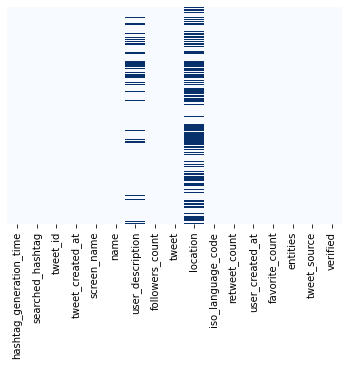

In [11]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap="Blues")

In [12]:
data['length'] = data['tweet'].apply(len)

In [13]:
data

,hashtag_generation_time,searched_hashtag,tweet_id,tweet_created_at,screen_name,name,user_description,followers_count,tweet,location,iso_language_code,retweet_count,user_created_at,favorite_count,entities,tweet_source,verified,length
0,2022-08-26 13:56:37.490901+00,CBI Unfold D Truth InSSRCase,1563158353391779844,2022-08-26 13:36:08+00,ATUL7735,ATUL,NaN,301,RT @privin07: @divine__ssr @ATUL7735 Thanks a ...,India,en,4,2011-03-15,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False,140
1,2022-08-26 13:54:52.480426+00,CBI Unfold D Truth InSSRCase,1563163059002101762,2022-08-26 13:54:50+00,BabyPink1803,Alli,Justice 4 Disha & SSR ~ :): 💛🦋💫 ~Your vibes sp...,1115,RT @keesain99: CBI Unfold D Truth InSSRCase \n...,Australia,en,114,2012-08-21,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False,140
2,2022-08-26 13:54:52.618819+00,CBI Unfold D Truth InSSRCase,1563163056934334464,2022-08-26 13:54:49+00,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @ChintuJainHS: @SatyaSSRian1 @PMOIndia @DoP...,Canada,en,2,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False,80
3,2022-08-26 13:54:52.656809+00,CBI Unfold D Truth InSSRCase,1563163055390744576,2022-08-26 13:54:49+00,its_ssrwarrior,S U P R I Y A,A Proud Fan of Sushant Singh Rajput.,2006,RT @sushfanseg: Why Rhea Chakraborty's custodi...,Earth,en,6,2020-10-02,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False,140
4,2022-08-26 13:54:52.696796+00,CBI Unfold D Truth InSSRCase,1563163052102791168,2022-08-26 13:54:48+00,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @manisha_1604: @SatyaSSRian1 @PMOIndia @DoP...,Canada,en,10,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5227,2022-08-27 09:37:33.966285+00,Perpetrators Free InSSRCase,1563450246876737536,2022-08-27 08:56:01+00,bunty81t,Prashant Kishor,NaN,44,"RT @SauravS91139716: Good Morning Warrior's,\n...",Delhi,en,62,2010-07-22,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter Web App,False,139
5228,2022-08-27 09:37:33.96842+00,Perpetrators Free InSSRCase,1563450246373380096,2022-08-27 08:56:00+00,privin07,Preeti🇮🇳 (God➡️Karma🤗🔱🤛🙏💞),God is d ultimate power🌺\nShiva+Shakti🔱🙏\nKris...,3781,RT @GauriSh00526155: @privin07 @IAmApa07 @itsS...,National Capital 🇮🇳,en,4,2009-09-21,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False,114
5229,2022-08-27 09:37:33.970742+00,Perpetrators Free InSSRCase,1563450245652312064,2022-08-27 08:56:00+00,Justice78602373,Justice For SSR,Fan of Sushant❤️\nSSR Alive in our hearts ❤️ f...,3154,RT @Dipshik37409256: According to SSR's family...,NaN,en,14,2020-07-22,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False,143
5230,2022-08-27 09:37:33.97306+00,Perpetrators Free InSSRCase,1563450243899092993,2022-08-27 08:56:00+00,kundu_ssrian,Koushani Kundu(SSRian),"Proud to be your fan Sushant , proud to be you...",476,RT @rd20082022: Sushant loved life and was pla...,India,en,24,2021-01-07,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False,140


<AxesSubplot:ylabel='Frequency'>

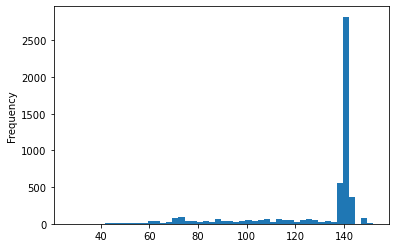

In [16]:
data['length'].plot(bins=50, kind='hist')

In [18]:
data.describe()

,tweet_id,followers_count,retweet_count,favorite_count,length
count,5.232000e+03,5232.000000,5232.000000,5232.000000,5232.000000
mean,1.563306e+18,1199.465214,42.383219,0.033257,128.456422
std,1.485519e+14,1241.802736,67.871158,0.275909,23.326840
min,1.563151e+18,0.000000,0.000000,0.000000,27.000000
25%,1.563158e+18,255.000000,12.000000,0.000000,130.750000
50%,1.563450e+18,613.000000,22.000000,0.000000,140.000000
75%,1.563454e+18,2003.000000,52.000000,0.000000,140.000000
max,1.563460e+18,6251.000000,779.000000,6.000000,152.000000


In [19]:
data[data['length']==27]['tweet'].iloc[0]

'Perpetrators Free InSSRCase'

In [21]:
data[data['length']==128]['tweet'].iloc[0]

'RT @SatyaSSRian1: What happened to the security of the building who was on duty on 13th &amp; 14th\n\nCBI Unfold D Truth InSSRCase'

In [22]:
positive = data[data['favorite_count']==0]

In [23]:
positive

,hashtag_generation_time,searched_hashtag,tweet_id,tweet_created_at,screen_name,name,user_description,followers_count,tweet,location,iso_language_code,retweet_count,user_created_at,favorite_count,entities,tweet_source,verified,length
0,2022-08-26 13:56:37.490901+00,CBI Unfold D Truth InSSRCase,1563158353391779844,2022-08-26 13:36:08+00,ATUL7735,ATUL,NaN,301,RT @privin07: @divine__ssr @ATUL7735 Thanks a ...,India,en,4,2011-03-15,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False,140
1,2022-08-26 13:54:52.480426+00,CBI Unfold D Truth InSSRCase,1563163059002101762,2022-08-26 13:54:50+00,BabyPink1803,Alli,Justice 4 Disha & SSR ~ :): 💛🦋💫 ~Your vibes sp...,1115,RT @keesain99: CBI Unfold D Truth InSSRCase \n...,Australia,en,114,2012-08-21,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False,140
2,2022-08-26 13:54:52.618819+00,CBI Unfold D Truth InSSRCase,1563163056934334464,2022-08-26 13:54:49+00,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @ChintuJainHS: @SatyaSSRian1 @PMOIndia @DoP...,Canada,en,2,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False,80
3,2022-08-26 13:54:52.656809+00,CBI Unfold D Truth InSSRCase,1563163055390744576,2022-08-26 13:54:49+00,its_ssrwarrior,S U P R I Y A,A Proud Fan of Sushant Singh Rajput.,2006,RT @sushfanseg: Why Rhea Chakraborty's custodi...,Earth,en,6,2020-10-02,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False,140
4,2022-08-26 13:54:52.696796+00,CBI Unfold D Truth InSSRCase,1563163052102791168,2022-08-26 13:54:48+00,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @manisha_1604: @SatyaSSRian1 @PMOIndia @DoP...,Canada,en,10,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5227,2022-08-27 09:37:33.966285+00,Perpetrators Free InSSRCase,1563450246876737536,2022-08-27 08:56:01+00,bunty81t,Prashant Kishor,NaN,44,"RT @SauravS91139716: Good Morning Warrior's,\n...",Delhi,en,62,2010-07-22,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter Web App,False,139
5228,2022-08-27 09:37:33.96842+00,Perpetrators Free InSSRCase,1563450246373380096,2022-08-27 08:56:00+00,privin07,Preeti🇮🇳 (God➡️Karma🤗🔱🤛🙏💞),God is d ultimate power🌺\nShiva+Shakti🔱🙏\nKris...,3781,RT @GauriSh00526155: @privin07 @IAmApa07 @itsS...,National Capital 🇮🇳,en,4,2009-09-21,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False,114
5229,2022-08-27 09:37:33.970742+00,Perpetrators Free InSSRCase,1563450245652312064,2022-08-27 08:56:00+00,Justice78602373,Justice For SSR,Fan of Sushant❤️\nSSR Alive in our hearts ❤️ f...,3154,RT @Dipshik37409256: According to SSR's family...,NaN,en,14,2020-07-22,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False,143
5230,2022-08-27 09:37:33.97306+00,Perpetrators Free InSSRCase,1563450243899092993,2022-08-27 08:56:00+00,kundu_ssrian,Koushani Kundu(SSRian),"Proud to be your fan Sushant , proud to be you...",476,RT @rd20082022: Sushant loved life and was pla...,India,en,24,2021-01-07,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False,140


In [28]:
negative = data[data['favorite_count']==1]

In [29]:
negative

,hashtag_generation_time,searched_hashtag,tweet_id,tweet_created_at,screen_name,name,user_description,followers_count,tweet,location,iso_language_code,retweet_count,user_created_at,favorite_count,entities,tweet_source,verified,length
369,2022-08-26 13:55:23.593039+00,CBI Unfold D Truth InSSRCase,1563161846143926274,2022-08-26 13:50:00+00,wesaidwhatnow,TanVee || ☆♡🦋 ♡☆,:): A devil who stans an angel ...,834,Another mxrdxr was being covered up as a heart...,NaN,en,1,2020-09-09,1,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False,140
440,2022-08-26 13:55:28.487156+00,CBI Unfold D Truth InSSRCase,1563161667969552384,2022-08-26 13:49:18+00,privin07,Preeti🇮🇳 (God➡️Karma🤗🔱🤛🙏💞),God is d ultimate power🌺\nShiva+Shakti🔱🙏\nKris...,3775,@Jen4SSR @ATUL7735 Thank you Jen 💖🥰\n\nCBI Unf...,National Capital 🇮🇳,en,1,2009-09-21,1,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False,89
642,2022-08-26 13:55:51.131957+00,CBI Unfold D Truth InSSRCase,1563160733214339072,2022-08-26 13:45:35+00,Satya91539128,Satya🇮🇳,NaN,2853,@Nyay4SSR Very Good Evening Angel\n\nCBI Unfol...,NaN,en,2,2020-12-12,1,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False,87
764,2022-08-26 13:56:02.191301+00,CBI Unfold D Truth InSSRCase,1563159960540057600,2022-08-26 13:42:31+00,privin07,Preeti🇮🇳 (God➡️Karma🤗🔱🤛🙏💞),God is d ultimate power🌺\nShiva+Shakti🔱🙏\nKris...,3775,@himansu91221pal @ATUL7735 Thank you Himanshu ...,National Capital 🇮🇳,en,1,2009-09-21,1,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False,140
1021,2022-08-26 13:56:22.225518+00,CBI Unfold D Truth InSSRCase,1563158985099710465,2022-08-26 13:38:38+00,sushfanseg,Nermeen,"Justice for sushant Singh rajput,\nI'm not a B...",2861,Why Rhea Chakraborty's custodial interrogation...,NaN,en,6,2016-11-18,1,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4708,2022-08-27 09:37:02.905444+00,Perpetrators Free InSSRCase,1563451365128826880,2022-08-27 09:00:27+00,MadhumitaroyC,Madhumita Roy Chowdhury( SSRF),i am from India\nby profession I'm a private t...,4936,@Satya91539128 @himansu91221pal Perpetrators F...,India,en,1,2020-07-31,1,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False,59
4731,2022-08-27 09:37:04.667601+00,Perpetrators Free InSSRCase,1563451313375301635,2022-08-27 09:00:15+00,MadhumitaroyC,Madhumita Roy Chowdhury( SSRF),i am from India\nby profession I'm a private t...,4936,@Satya91539128 @privin07 Perpetrators Free InS...,India,en,1,2020-07-31,1,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False,52
4736,2022-08-27 09:37:04.679166+00,Perpetrators Free InSSRCase,1563451303799312385,2022-08-27 09:00:13+00,Hemant36182804,Hemant Vardani - Fighting for Sushant 🙏🙏🇮🇳🇮🇳,I will fight for sushant till getting justice....,2256,@Khushiii88 @PMOIndia @HMOIndia @narendramodi ...,In memories of sushant ❤❤,en,1,2018-03-19,1,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter Web App,False,83
4744,2022-08-27 09:37:05.531011+00,Perpetrators Free InSSRCase,1563451270270447616,2022-08-27 09:00:05+00,MadhumitaroyC,Madhumita Roy Chowdhury( SSRF),i am from India\nby profession I'm a private t...,4936,@Satya91539128 @PMOIndia @DoPTGoI Perpetrators...,India,en,1,2020-07-31,1,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False,61


In [30]:
sentences = data['tweet'].tolist()

In [31]:
sentences

['RT @privin07: @divine__ssr @ATUL7735 Thanks a lot Diyu for such lovely words 💗🥰\n\nWe all are amazing and Sushi is proud of us all🙌\n\nCBI Unfo…',
 'RT @keesain99: CBI Unfold D Truth InSSRCase \n\nTruth and justice are above and beyond everything for the greatness of nations depends on the…',
 'RT @ChintuJainHS: @SatyaSSRian1 @PMOIndia @DoPTGoI CBI Unfold D Truth InSSRCase🔥',
 "RT @sushfanseg: Why Rhea Chakraborty's custodial interrogation is not done by CBI??\n\n@IPS_Association @PMOIndia \nCBI Unfold D Truth InSSRCa…",
 'RT @manisha_1604: @SatyaSSRian1 @PMOIndia @DoPTGoI CBI Unfold D Truth InSSRCase🔥🔥',
 'RT @carmiemonsang21: @AshutoshSureka @AlkeshAmin912 @itsSSR @IamChaitali321 @KachruRachna @MadhumitaroyC @nuthan_ch @Sushxrabbit @kiran4747…',
 'RT @PurnimaSengup11: @SatyaSSRian1 @PMOIndia @DoPTGoI CBI Unfold D Truth InSSRCase🔥',
 'RT @SSRkaFan: Sushant family and fans are waiting for an update in SSR case. CBI please give an update in SSR case without any further dela…',
 'RT @d

In [32]:
len(sentences)

5232

In [41]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'